## Problem Statement:

##### Pick up the following stocks and generate forecasts accordingly

### Stocks:

1.NASDAQ.AAPL
2.NASDAQ.ADP
3.NASDAQ.CBOE
4.NASDAQ.CSCO
5.NASDAQ.EBAY

### 1.NASDAQ.AAPL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
df["AAPL_log"] = df["NASDAQ.AAPL"].apply(lambda x:np.log(x) )

In [3]:
df["AAPL_log"].head()

0    4.967589
1    4.967728
2    4.967659
3    4.967310
4    4.967449
Name: AAPL_log, dtype: float64

In [4]:
type(df["DATE"][0])

numpy.int64

In [5]:
import datetime as dt

In [6]:
df["DATE_org"]=df["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S") )

In [7]:
import statsmodels.api as sm

In [8]:
sm.stats.durbin_watson(df["AAPL_log"])

1.5195875753588083e-08

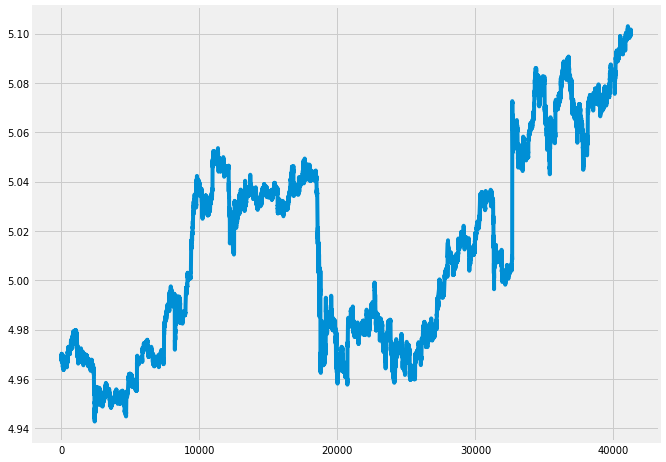

In [9]:
%matplotlib inline
df["AAPL_log"].plot(figsize=(10,8));

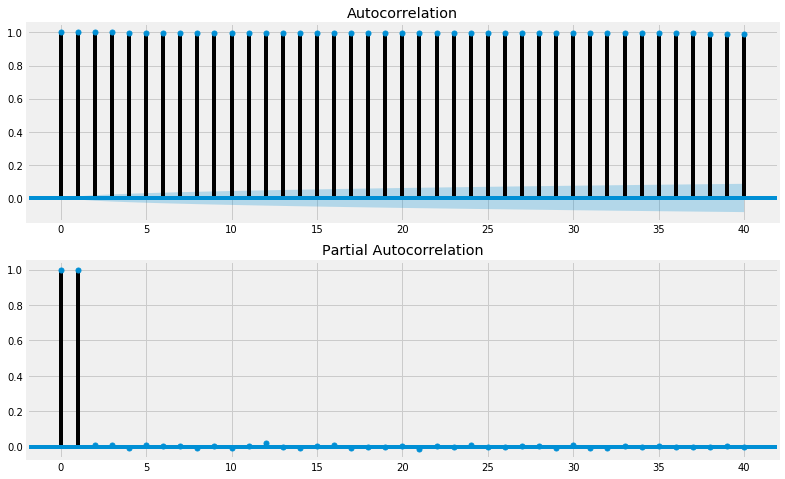

In [10]:
# Show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["AAPL_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["AAPL_log"], lags=40, ax=ax2)

In [12]:
array = (df["AAPL_log"].dropna().as_matrix())

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [13]:
array

array([4.9675886 , 4.96772779, 4.9676589 , ..., 5.0999274 , 5.09913445,
       5.09974447])

In [14]:
df["difflog_AAPLE"] = df["AAPL_log"]-df["AAPL_log"].shift(periods=-1)

In [15]:
model = sm.tsa.ARMA(array, (2,0)).fit()
print(model.params)

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

[5.02084133 0.99073776 0.00918424]


In [16]:
print(model.aic, model.bic, model.hqic)

-492715.64021724596 -492681.1290404646 -492704.73243593937


In [17]:
# Searching forr best parameters
aic=99999
b_p,b_d,b_q=0,0,0
for p in range(3):
    for d in range(1,3):
        for q in range(3):
            try:
                model = ARIMA(array,(p,d,q)).fit()
                if(aic > model.aic):
                    aic = model.aic
                    b_p,b_d,b_q=p,d,q
            except:
                pass
print(b_p,b_d,b_q)

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

1 1 2


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [18]:
model = ARIMA(array, (1,1,0)).fit()

C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\user\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

In [19]:
sm.stats.durbin_watson(model.resid)

2.0003049069168757

In [20]:
pred = model.predict()
pred

array([3.19911435e-06, 1.93976779e-06, 3.86675903e-06, ...,
       2.66446376e-06, 9.43767222e-06, 1.05719400e-05])

In [21]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred,df["NASDAQ.EBAY"][:-1])))

34.81183087984857
